In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('tracks.csv')

In [ ]:
df.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [ ]:
df.shape

(586672, 20)

In [ ]:
df_2 = df[df['popularity'] > 65]
df_2 = df_2[df_2['release_date'].str[0:4].astype(int) > 1970]

In [ ]:
df_2.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
44488,2TVxnKdb3tqe1nhQWwwZCO,Tiny Dancer,80,377093,0,['Elton John'],['3PhoLpVuITZKcymswpck5b'],1971-11-05,0.414,0.428,0,-11.097,1,0.0278,0.382,0.000243,0.1480,0.282,145.075,4
44489,5CQ30WqJwcep0pYcV4AMNc,Stairway to Heaven - Remaster,79,482830,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1971-11-08,0.338,0.340,9,-12.049,0,0.0339,0.580,0.003200,0.1160,0.197,82.433,4
44490,7pKfPomDEeI4TPT6EOYjn9,Imagine - Remastered 2010,79,187867,0,['John Lennon'],['4x1nvY2FN8jxqAFA0DA02H'],1971-09-09,0.547,0.257,0,-12.358,1,0.0252,0.907,0.183000,0.0935,0.169,75.752,4
44491,1k1Bqnv2R0uJXQN4u6LKYt,Ain't No Sunshine,79,125093,0,['Bill Withers'],['1ThoqLcyIYvZn7iWbj8fsj'],1971-05-01,0.527,0.415,4,-11.451,0,0.1220,0.457,0.000017,0.1170,0.515,78.169,4
44492,3qiyyUfYe7CRYLucrPmulD,Baba O'Riley,78,300400,0,['The Who'],['67ea9eGLXYMsO2eYQRui3w'],1971-08-14,0.489,0.724,5,-8.367,1,0.0352,0.313,0.185000,0.2870,0.150,117.292,4
44493,1fDsrQ23eTAVFElUMaf38X,American Pie,76,516893,0,['Don McLean'],['1gRNBaI4yn6wCCTvRhGWh8'],1971,0.531,0.481,4,-11.709,0,0.0600,0.699,0.000000,0.0842,0.491,138.450,4
44494,14XWXWv5FoCbFzLksawpEe,Riders on the Storm,74,434720,0,['The Doors'],['22WZ7M8sxp5THdruNY3gXt'],1971-04-19,0.550,0.722,11,-11.729,0,0.0283,0.250,0.012900,0.1100,0.716,103.886,4
44495,6rovOdp3HgK1DeAMYDzoA7,Maggie May,74,350267,0,['Rod Stewart'],['2y8Jo9CKhJvtfeKOsYzRdT'],1971-05-18,0.605,0.574,2,-10.536,1,0.0377,0.559,0.113000,0.0684,0.543,129.449,4
44496,1IqFh00G2kvvMm8pRMpehA,Me and Bobby McGee,73,271333,0,['Janis Joplin'],['4NgfOZCL9Ml67xzM0xzIvC'],1971-01-11,0.430,0.463,2,-10.960,1,0.0442,0.303,0.000058,0.1520,0.660,93.405,4
44497,3qT4bUD1MaWpGrTwcvguhb,Black Dog - Remaster,73,295387,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1971-11-08,0.437,0.864,4,-7.842,0,0.0904,0.396,0.031400,0.2420,0.749,81.394,4


In [ ]:
df_2.shape

(12825, 20)

In [ ]:
df_features = df_2[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

array([[<Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='energy', ylabel='danceability'>,
        <Axes: xlabel='loudness', ylabel='danceability'>,
        <Axes: xlabel='speechiness', ylabel='danceability'>,
        <Axes: xlabel='acousticness', ylabel='danceability'>,
        <Axes: xlabel='instrumentalness', ylabel='danceability'>,
        <Axes: xlabel='liveness', ylabel='danceability'>,
        <Axes: xlabel='valence', ylabel='danceability'>,
        <Axes: xlabel='tempo', ylabel='danceability'>],
       [<Axes: xlabel='danceability', ylabel='energy'>,
        <Axes: xlabel='energy', ylabel='energy'>,
        <Axes: xlabel='loudness', ylabel='energy'>,
        <Axes: xlabel='speechiness', ylabel='energy'>,
        <Axes: xlabel='acousticness', ylabel='energy'>,
        <Axes: xlabel='instrumentalness', ylabel='energy'>,
        <Axes: xlabel='liveness', ylabel='energy'>,
        <Axes: xlabel='valence', ylabel='energy'>,
        <Axes: xlabel='tempo', y

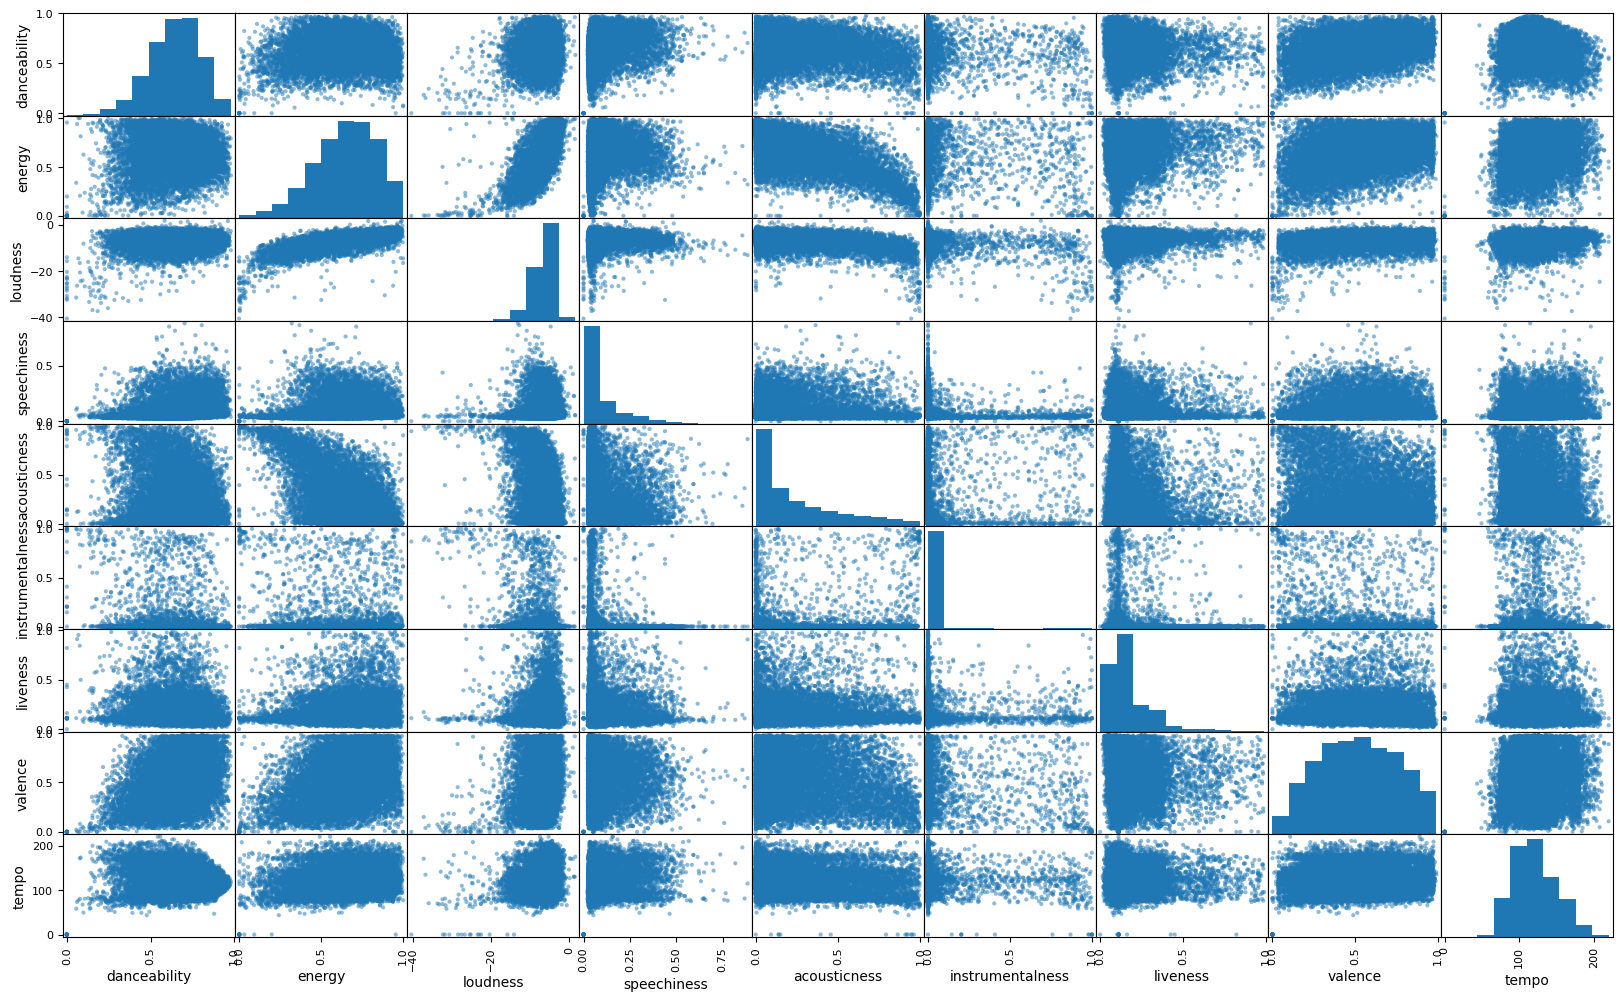

In [ ]:
pd.plotting.scatter_matrix(df_features, figsize=(20,12))

In [ ]:
df_features.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.070283,0.181540,0.231428,-0.142409,-0.139611,-0.079742,0.394965,-0.090257
energy,0.070283,1.000000,0.699098,0.033548,-0.606355,-0.122674,0.152724,0.378656,0.157193
loudness,0.181540,0.699098,1.000000,0.030274,-0.442951,-0.343051,0.084679,0.263669,0.142818
speechiness,0.231428,0.033548,0.030274,1.000000,-0.060758,-0.072120,0.047567,0.039943,0.098421
acousticness,-0.142409,-0.606355,-0.442951,-0.060758,1.000000,0.110010,-0.065830,-0.180617,-0.105451
instrumentalness,-0.139611,-0.122674,-0.343051,-0.072120,0.110010,1.000000,-0.005458,-0.122560,-0.052789
liveness,-0.079742,0.152724,0.084679,0.047567,-0.065830,-0.005458,1.000000,0.033349,0.016503
valence,0.394965,0.378656,0.263669,0.039943,-0.180617,-0.122560,0.033349,1.000000,0.077241
tempo,-0.090257,0.157193,0.142818,0.098421,-0.105451,-0.052789,0.016503,0.077241,1.000000


array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>]], dtype=object)

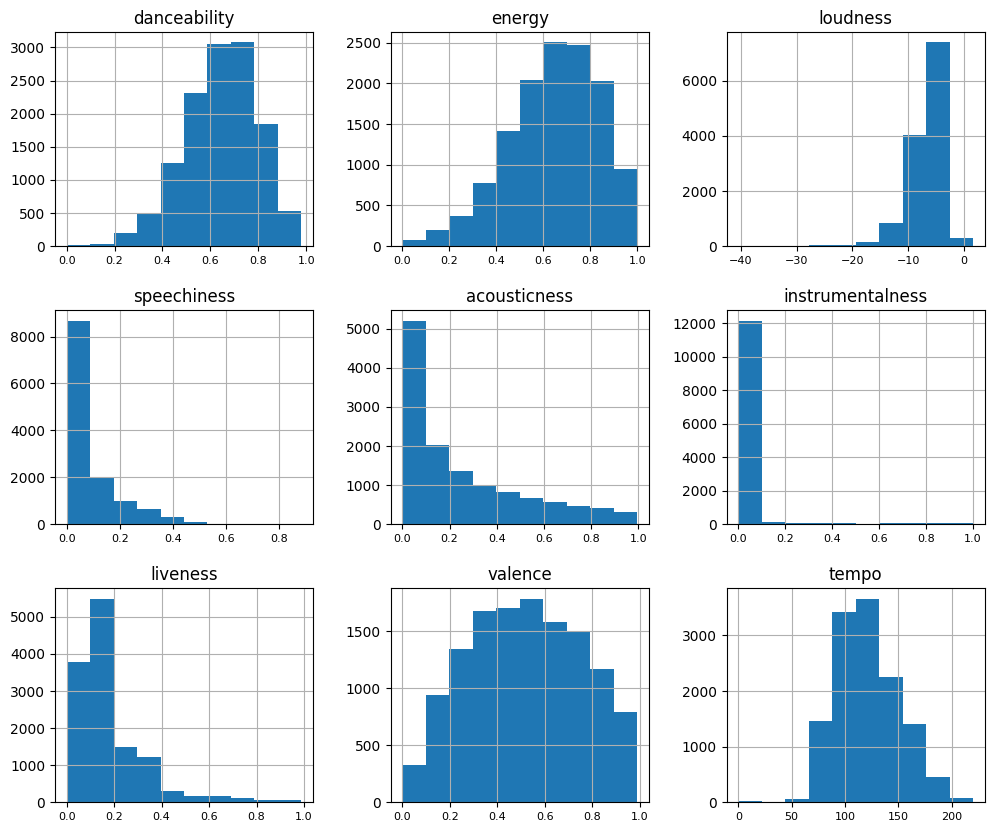

In [ ]:
df_features.hist(xlabelsize=8, figsize=(12,10))

In [ ]:
df_features = df_features[['danceability','energy','valence']]

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_features)

In [ ]:
ine = []
for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df_scaled)
    preds = model.predict(df_scaled)
    ine.append(model.inertia_)

[Text(0.5, 0, 'Cluster Size'), Text(0, 0.5, 'Inertia')]

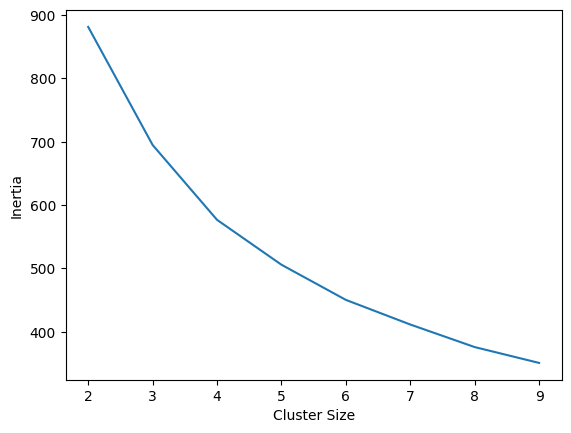

In [ ]:
pd.DataFrame(ine, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_scaled)
preds = model.predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_2['cluster'] = preds
df_2 = df_2.reset_index(drop=True)


In [ ]:

cluster_centers = model.cluster_centers_

plt.scatter(df_2['danceability'], df_2['energy'], c=df_2['cluster'], cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='black')
plt.title('K-Means Clustering')
plt.xlabel('danceability')
plt.ylabel('energy')
plt.show()

In [ ]:
df_2.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,2TVxnKdb3tqe1nhQWwwZCO,Tiny Dancer,80,377093,0,['Elton John'],['3PhoLpVuITZKcymswpck5b'],1971-11-05,0.414,0.428,...,-11.097,1,0.0278,0.382,0.000243,0.1480,0.282,145.075,4,1
1,5CQ30WqJwcep0pYcV4AMNc,Stairway to Heaven - Remaster,79,482830,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1971-11-08,0.338,0.340,...,-12.049,0,0.0339,0.580,0.003200,0.1160,0.197,82.433,4,1
2,7pKfPomDEeI4TPT6EOYjn9,Imagine - Remastered 2010,79,187867,0,['John Lennon'],['4x1nvY2FN8jxqAFA0DA02H'],1971-09-09,0.547,0.257,...,-12.358,1,0.0252,0.907,0.183000,0.0935,0.169,75.752,4,1
3,1k1Bqnv2R0uJXQN4u6LKYt,Ain't No Sunshine,79,125093,0,['Bill Withers'],['1ThoqLcyIYvZn7iWbj8fsj'],1971-05-01,0.527,0.415,...,-11.451,0,0.1220,0.457,0.000017,0.1170,0.515,78.169,4,2
4,3qiyyUfYe7CRYLucrPmulD,Baba O'Riley,78,300400,0,['The Who'],['67ea9eGLXYMsO2eYQRui3w'],1971-08-14,0.489,0.724,...,-8.367,1,0.0352,0.313,0.185000,0.2870,0.150,117.292,4,3


In [ ]:
songs = ['5CQ30WqJwcep0pYcV4AMNc']
# sample input: 5CQ30WqJwcep0pYcV4AMNc,1k1Bqnv2R0uJXQN4u6LKYt,3qiyyUfYe7CRYLucrPmulD

# search the specified ids in this dataset and get the tracks
favorites = df_2[df_2.id.isin(songs)]

cluster_numbers = list(favorites['cluster'])
clusters = {}
for num in cluster_numbers:
  clusters[num] = cluster_numbers.count(num)

# sort the cluster numbers and find out the number which occurs the most
user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1])][0][0]

print('\nFavorite cluster:', user_favorite_cluster, '\n')

# finally get the tracks of that cluster
suggestions = df_2[df_2.cluster == user_favorite_cluster]

suggestions.head()


Favorite cluster: 1 



,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,2TVxnKdb3tqe1nhQWwwZCO,Tiny Dancer,80,377093,0,['Elton John'],['3PhoLpVuITZKcymswpck5b'],1971-11-05,0.414,0.428,...,-11.097,1,0.0278,0.382,0.000243,0.1480,0.282,145.075,4,1
1,5CQ30WqJwcep0pYcV4AMNc,Stairway to Heaven - Remaster,79,482830,0,['Led Zeppelin'],['36QJpDe2go2KgaRleHCDTp'],1971-11-08,0.338,0.340,...,-12.049,0,0.0339,0.580,0.003200,0.1160,0.197,82.433,4,1
2,7pKfPomDEeI4TPT6EOYjn9,Imagine - Remastered 2010,79,187867,0,['John Lennon'],['4x1nvY2FN8jxqAFA0DA02H'],1971-09-09,0.547,0.257,...,-12.358,1,0.0252,0.907,0.183000,0.0935,0.169,75.752,4,1
11,52dm9op3rbfAkc1LGXgipW,Wild Horses - 2009 Mix,72,341773,0,['The Rolling Stones'],['22bE4uQ6baNwSHPVcDxLCe'],1971-04-23,0.432,0.389,...,-6.517,1,0.0255,0.687,0.010700,0.0788,0.158,139.506,4,1
12,3ZE3wv8V3w2T2f7nOCjV0N,Life on Mars? - 2015 Remaster,72,235987,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],1971-12-17,0.442,0.384,...,-14.635,1,0.0414,0.639,0.000077,0.0539,0.216,123.281,4,1
